In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

In [2]:
from sklearn import preprocessing, metrics
import utils
import scipy.io
import numpy as np
from linear_classifier import LinearSVM_twoclass

# load the SPAM email training dataset

N_train = 3600

X,y = utils.load_mat('data/spamTrain.mat')
yy = np.ones(y.shape)
yy[y==0] = -1

# X = np.hstack([np.ones((X.shape[0], 1)), X])

X_train = X[:N_train] # <--- training data
yy_train = yy[:N_train] # <--- training label

X_val = X[N_train:] # <--- validation data
yy_val = yy[N_train:] # <--- validation label

# load the SPAM email test dataset

test_data = scipy.io.loadmat('data/spamTest.mat')
X_test = test_data['Xtest'] # <--- testing label
y_test = test_data['ytest'].flatten()

yy_test = np.ones(y_test.shape)
yy_test[y_test == 0] = -1 # <--- testing label

# X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

In [4]:
##################################################################################
#  YOUR CODE HERE for training the best performing SVM for the data above.       #
#  what should C be? What should num_iters be? Should X be scaled?               #
#  should X be kernelized? What should the learning rate be? What should the     #
#  number of iterations be?                                                      #
##################################################################################

# sigma = 10.0
# K = np.array([utils.gaussian_kernel(x1,x2,sigma) for x1 in X_train for x2 in X_train]).reshape(X_train.shape[0],X_train.shape[0])
scaler = preprocessing.StandardScaler().fit(X_train.astype('float64'))
scaleK = scaler.transform(X_train)
KK = np.vstack([np.ones((scaleK.shape[0],)),scaleK.T]).T

# Kval = np.array([utils.gaussian_kernel(x1,x2,sigma) for x1 in X_val for x2 in X_train]).reshape(X_val.shape[0],X_train.shape[0])
# scalerval = preprocessing.StandardScaler().fit(Kval)
scaleKval = scaler.transform(X_val.astype('float64'))
KKval = np.vstack([np.ones((scaleKval.shape[0],)),scaleKval.T]).T

# Ktest = np.array([utils.gaussian_kernel(x1,x2,sigma) for x1 in X_test for x2 in X_train]).reshape(X_test.shape[0],X_train.shape[0])
# scalertest = preprocessing.StandardScaler().fit(Ktest)
scaleKtest = scaler.transform(X_test.astype('float64'))
KKtest = np.vstack([np.ones((scaleKtest.shape[0],)),scaleKtest.T]).T


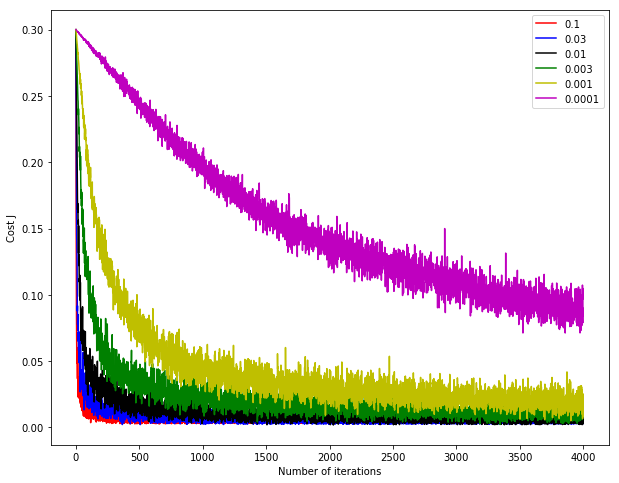

In [6]:
# choose learning rate
color = ['r','b','k','g','y','m']
LearningRatevals = [1e-1,3e-2,1e-2,3e-3,1e-3,1e-4]
color_idx = 0
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for LR in LearningRatevals:
#     svm = LinearSVM_twoclass()
#     svm.theta = np.zeros((X_train.shape[1],))
#     J_history = svm.train(X_train,yy_train,learning_rate=LR,reg=0.3,num_iters=1000,verbose=False,batch_size=X_train.shape[0])
    svm = LinearSVM_twoclass()
    svm.theta = np.zeros((KK.shape[1],))
    J_history = svm.train(KK,yy_train,learning_rate=LR,reg=0.3,num_iters=4000,verbose=False,batch_size=200)
    plt.plot(range(len(J_history)), J_history, color[color_idx])
    color_idx += 1
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend([str(a) for a in LearningRatevals])
plt.show()
fig.savefig("./fig_learning_rate_linear.pdf", format='pdf')

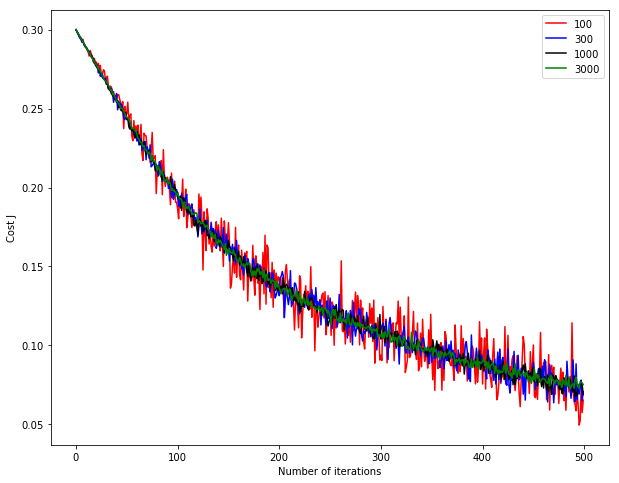

In [8]:
# choose batch size
Best_learning_rate = 1e-3
BatchSizes = [100,300,1000,3000]
color_idx = 0
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for BS in BatchSizes:
    svm = LinearSVM_twoclass()
    svm.theta = np.zeros((KK.shape[1],))
    J_history = svm.train(KK,yy_train,learning_rate=Best_learning_rate,reg=0.3,num_iters=500,verbose=False,batch_size=BS)
    plt.plot(range(len(J_history)), J_history, color[color_idx])
    color_idx += 1
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend([str(a) for a in BatchSizes])
plt.show()
fig.savefig("./fig_batch_size_linear.pdf", format='pdf')

In [78]:
# choose C
Best_batch_size=300
Cvals = [0.01,0.03,0.1,0.3,1.0,3.0,10.0,30.0,100.0]
for C in Cvals:
    svm = LinearSVM_twoclass()
    svm.theta = np.zeros((KK.shape[1],))
    J_history = svm.train(KK,yy_train,learning_rate=Best_learning_rate,reg=C,num_iters=500,verbose=False,batch_size=Best_batch_size)
    yy_pred_train = svm.predict(KK)
    accuracy_train = np.mean(yy_pred_train == yy_train)
    yy_pred_val = svm.predict(KKval)
    accuracy_val = np.mean(yy_pred_val == yy_val)
    print "C:\t", C, ", training accuracy:\t", accuracy_train, ", validation accuracy:\t", accuracy_val

C:	0.01 , training accuracy:	0.9586111111111111 , validation accuracy:	0.9525
C:	0.03 , training accuracy:	0.9572222222222222 , validation accuracy:	0.9525
C:	0.1 , training accuracy:	0.9675 , validation accuracy:	0.955
C:	0.3 , training accuracy:	0.9819444444444444 , validation accuracy:	0.9725
C:	1.0 , training accuracy:	0.9919444444444444 , validation accuracy:	0.98
C:	3.0 , training accuracy:	0.9991666666666666 , validation accuracy:	0.9825
C:	10.0 , training accuracy:	0.9991666666666666 , validation accuracy:	0.975
C:	30.0 , training accuracy:	0.9994444444444445 , validation accuracy:	0.9625
C:	100.0 , training accuracy:	0.9997222222222222 , validation accuracy:	0.9725


In [13]:
# choose iteration
Best_C = 3.0
Iterations = [100,300,1000,3000]
for iteration in Iterations:
    svm = LinearSVM_twoclass()
    svm.theta = np.zeros((KK.shape[1],))
    J_history = svm.train(KK,yy_train,learning_rate=Best_learning_rate,reg=Best_C,num_iters=iteration,verbose=False,batch_size=Best_batch_size)
    yy_pred_train = svm.predict(KK)
    accuracy_train = np.mean(yy_pred_train == yy_train)
    yy_pred_val = svm.predict(KKval)
    accuracy_val = np.mean(yy_pred_val == yy_val)
    print "iteration:\t", iteration, ", training accuracy:\t", accuracy_train, ", validation accuracy:\t", accuracy_val

iteration:	100 , training accuracy:	0.9636111111111111 , validation accuracy:	0.955
iteration:	300 , training accuracy:	0.9777777777777777 , validation accuracy:	0.9675
iteration:	1000 , training accuracy:	0.9894444444444445 , validation accuracy:	0.9725
iteration:	3000 , training accuracy:	0.9966666666666667 , validation accuracy:	0.9775


In [14]:
Best_iteration = 1000
# C_sweep = [0.05,0.07,0.10,0.15,0.20]
C_sweep = [.05,1.0,2.0,3.0,4.0,7.0,10.0]
Best_val = -1
Best_C = None

for C in C_sweep:
    svm = LinearSVM_twoclass()
    svm.theta = np.zeros((KK.shape[1],))
    J_history = svm.train(KK,yy_train,learning_rate=Best_learning_rate,reg=C,num_iters=Best_iteration,verbose=False,batch_size=Best_batch_size)
    yy_pred_train = svm.predict(KK)
    accuracy_train = np.mean(yy_pred_train == yy_train)
    yy_pred_val = svm.predict(KKval)
    accuracy_val = np.mean(yy_pred_val == yy_val)
    print "C:\t", C, ", training accuracy:\t", accuracy_train, ", validation accuracy:\t", accuracy_val
    if accuracy_val > Best_val:
        Best_val = accuracy_val
        Best_C = C
print "Best:\t", Best_val, Best_C

C:	0.05 , training accuracy:	0.9588888888888889 , validation accuracy:	0.9525
C:	1.0 , training accuracy:	0.9791666666666666 , validation accuracy:	0.97
C:	2.0 , training accuracy:	0.985 , validation accuracy:	0.9725
C:	3.0 , training accuracy:	0.9902777777777778 , validation accuracy:	0.9725
C:	4.0 , training accuracy:	0.9911111111111112 , validation accuracy:	0.9775
C:	7.0 , training accuracy:	0.9955555555555555 , validation accuracy:	0.9775
C:	10.0 , training accuracy:	0.9969444444444444 , validation accuracy:	0.98
Best:	0.98 10.0


In [17]:
Best_C = 3.0
Best_batch_size=300
# Best_accuracy = 0.0

svm = LinearSVM_twoclass()
svm.theta = np.zeros((KK.shape[1],))


##################################################################################
# YOUR CODE HERE for testing your best model's performance                       #
# what is the accuracy of your best model on the test set? On the training set?  #
##################################################################################

J_history = svm.train(KK,yy_train,learning_rate=Best_learning_rate,reg=Best_C,num_iters=10000,verbose=True,batch_size=Best_batch_size)
yy_pred_train = svm.predict(KK)
accuracy_train = np.mean(yy_pred_train == yy_train)
yy_pred_val = svm.predict(KKval)
accuracy_val = np.mean(yy_pred_val == yy_val)
yy_pred_test = svm.predict(KKtest)
accuracy_test = np.mean(yy_pred_test == yy_test)
print "C:\t", Best_C, ", training accuracy:\t", accuracy_train, ", validation accuracy:\t", accuracy_val, ", testing accuracy:\t", accuracy_test


iteration 0 / 10000: loss 3.000000
iteration 100 / 10000: loss 0.373699
iteration 200 / 10000: loss 0.344866
iteration 300 / 10000: loss 0.265965
iteration 400 / 10000: loss 0.159044
iteration 500 / 10000: loss 0.192284
iteration 600 / 10000: loss 0.205987
iteration 700 / 10000: loss 0.080605
iteration 800 / 10000: loss 0.134104
iteration 900 / 10000: loss 0.070511
iteration 1000 / 10000: loss 0.115110
iteration 1100 / 10000: loss 0.070337
iteration 1200 / 10000: loss 0.120728
iteration 1300 / 10000: loss 0.043401
iteration 1400 / 10000: loss 0.042535
iteration 1500 / 10000: loss 0.059325
iteration 1600 / 10000: loss 0.055514
iteration 1700 / 10000: loss 0.091735
iteration 1800 / 10000: loss 0.057982
iteration 1900 / 10000: loss 0.053596
iteration 2000 / 10000: loss 0.038762
iteration 2100 / 10000: loss 0.054391
iteration 2200 / 10000: loss 0.036116
iteration 2300 / 10000: loss 0.021552
iteration 2400 / 10000: loss 0.024169
iteration 2500 / 10000: loss 0.048598
iteration 2600 / 10000: 

In [18]:
##################################################################################
# ANALYSIS OF MODEL: Print the top 15 words that are predictive of spam and for  #
# ham. Hint: use the coefficient values of the learned model                     #
##################################################################################
words, inv_words = utils.get_vocab_dict()
# plt.plot(svm.theta[1:])
print "============ top 15 spam ============"
for a in svm.theta[1:].argsort()[-15:][::-1]:
    print words[a+1]
print "============ top 15 ham ============"    
for a in svm.theta[1:].argsort()[:15][::-1]:
    print words[a+1]    
##################################################################################
#                    END OF YOUR CODE                                            #
##################################################################################

============ top 15 spam ============
click
remov
nbsp
basenumb
our
here
guarante
visit
pleas
bodi
flash
below
credit
dollar
will
============ top 15 ham ============
list
or
seri
wrote
yahoo
author
rpm
httpaddr
user
numbertnumb
razor
date
url
the
spamassassin
